In [439]:
import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [423]:
# Constants

hash1_constant = 16900
hash2_constant = 1098500

In [424]:
def hash1(key, size_table=2500):
    hash_sum = -hash1_constant
    
    for index in range(6):
        hash_sum += ord(key[index]) ** 2
    
    return hash_sum % size_table


def hash2(key, size_table=2500):
    hash_sum = -hash2_constant
    
    for index in range(6):
        hash_sum += ord(key[index]) ** 3
    
    return hash_sum % size_table


def generate_random_key():
    key = ""
    key += chr(random.randrange(48, 58, 1))
    
    for index in range(4):
        key += chr(random.randrange(65, 91, 1))
        
    key += chr(random.randrange(48, 58, 1))
    return key

In [425]:
array_of_keys = np.array(np.zeros(shape=10000), dtype=[("key","U6"), ("hash1","i4"), ("hash2","i4"), ("count", "i4")])

for index in range(10000):
    key = generate_random_key()
    
    array_of_keys[index][0] = key
    array_of_keys[index][1] = hash1(key)
    array_of_keys[index][2] = hash2(key)
    array_of_keys[index][3] = 1

In [426]:
array_of_keys

array([('8OYFW5',  676,  504, 1), ('5JDGI9', 2128, 2154, 1),
       ('7ZTVA1',  303,  409, 1), ..., ('0RASE1',  404, 1030, 1),
       ('7CCBG2', 2000, 2308, 1), ('6HCKH6', 1914,  562, 1)],
      dtype=[('key', '<U6'), ('hash1', '<i4'), ('hash2', '<i4'), ('count', '<i4')])

In [427]:
df = pd.DataFrame(data=array_of_keys, columns=['key', 'hash1', 'hash2', 'count'])
df

,key,hash1,hash2,count
0,8OYFW5,676,504,1
1,5JDGI9,2128,2154,1
2,7ZTVA1,303,409,1
3,7OMTV1,148,1356,1
4,8THOE8,114,232,1
...,...,...,...,...
9995,1GAGB3,1765,2243,1
9996,7VQOS3,813,349,1
9997,0RASE1,404,1030,1
9998,7CCBG2,2000,2308,1


In [437]:
df_1 = df.groupby(by='hash1', as_index=False, sort=True).count()
df_1 = df_1.get(['hash1', 'count'])

df_1

,hash1,count
0,0,1
1,1,5
2,2,4
3,3,4
4,4,2
...,...,...
2443,2495,4
2444,2496,5
2445,2497,1
2446,2498,3


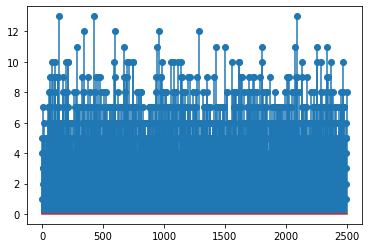

In [444]:
fig, ax = plt.subplots()

ax.stem(df_1['hash1'], df_1['count'])

plt.show()

In [438]:
df_2 = df.groupby(by='hash2', as_index=False, sort=True).count()
df_2 = df_2.get(['hash2', 'count'])

df_2

,hash2,count
0,0,2
1,1,4
2,2,6
3,3,3
4,5,2
...,...,...
2447,2495,2
2448,2496,4
2449,2497,3
2450,2498,2


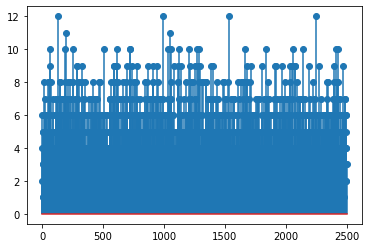

In [446]:
fig, ax = plt.subplots()

ax.stem(df_2['hash2'], df_2['count'])

plt.show()

In [459]:
df_3 = df[df['hash1'] == 1]

df_3

,key,hash1,hash2,count
2280,4XNSL4,1,2003,1
3073,3ELKI5,1,1405,1
4176,2PJFC8,1,603,1
4358,0GTVF4,1,2371,1
9020,9LAQC3,1,149,1


In [460]:
df_4 = df[df['hash2'] == 1]

df_4

,key,hash1,hash2,count
1686,1MBXL7,2331,1,1
3899,0AHWM2,811,1,1
5636,7HTGC2,395,1,1
9009,4LWPC3,139,1,1


In [461]:
df_5 = df[df['hash1'] == df['hash2']]

df_5

,key,hash1,hash2,count
753,2EFHZ0,849,849,1
3269,6FJZA4,1421,1421,1
7679,0AONS1,1244,1244,1
7941,5HMEY5,13,13,1
8837,5PJIE1,276,276,1
